In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#den oberen Teil kennt man schon vom letzten Mal...
#Theano kommt neu dazu - 
#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#Jetzt noch scikit-learn:
#hier stecken viele Funktionalitäten drin, die man gut brauchen kann: 
#Fehlerfunktionen, Standard-Modelltypen, Preprocessing-Algorithmen, Daten... 

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#Import wichtiger Keras Funktionalitäten

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.utils import to_categorical
from keras.optimizers import SGD #Stochastic Gradient Descent
from keras.utils import plot_model

import pickle

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# prepare gray scale data
data_gray_file = open('./archiv/data6.pickle', 'rb')
data_gray = pickle.load(data_gray_file, encoding='latin1')
data_gray_file.close()

# Preparing y_train and y_validation for use in Keras
data_gray['y_train'] = to_categorical(data_gray['y_train'], num_classes=43)
data_gray['y_validation'] = to_categorical(data_gray['y_validation'], num_classes=43)


# prepare color data
data_color_file = open('./archiv/data1.pickle', 'rb')
data_color = pickle.load(data_color_file, encoding='latin1')
data_color_file.close()

# Preparing y_train and y_validation for use in Keras
data_color['y_train'] = to_categorical(data_color['y_train'], num_classes=43)
data_color['y_validation'] = to_categorical(data_color['y_validation'], num_classes=43)

In [4]:
# Transpose data to have channel at the end
x_train_gray = data_gray['x_train'].transpose(0, 2, 3, 1)
x_train_color = data_color['x_train'].transpose(0, 2, 3, 1)

x_test_gray = data_gray['x_test'].transpose(0, 2, 3, 1)
x_test_color = data_color['x_test'].transpose(0, 2, 3, 1)

x_validation_gray = data_gray['x_validation'].transpose(0, 2, 3, 1)
x_validation_color = data_color['x_validation'].transpose(0, 2, 3, 1)

# one hot encoding
#y_train_gray = to_categorical(data_gray['y_train'], num_classes=43)
y_train_gray = data_gray['y_train']
y_train_color = to_categorical(data_color['y_train'], num_classes=43)
y_test_gray = to_categorical(data_gray['y_test'], num_classes=43)
#y_test_gray = data_gray['y_test']
y_test_color = to_categorical(data_color['y_test'], num_classes=43)

print('x_train_gray.shape: ' + str(x_train_gray.shape))
print('x_train_color.shape: ' + str(x_train_color.shape))
print('x_test_gray.shape: ' + str(x_test_gray.shape))
print('x_test_color.shape: ' + str(x_test_color.shape))


print('y_train_gray.shape: ' + str(y_train_gray.shape))
print('y_train_color.shape: ' + str(y_train_color.shape))
print('y_test_gray.shape: ' + str(y_test_gray.shape))
print('y_test_color.shape: ' + str(y_test_color.shape))

x_train_gray.shape: (86989, 32, 32, 1)
x_train_color.shape: (86989, 32, 32, 3)
x_test_gray.shape: (12630, 32, 32, 1)
x_test_color.shape: (12630, 32, 32, 3)
y_train_gray.shape: (86989, 43)
y_train_color.shape: (86989, 43, 43)
y_test_gray.shape: (12630, 43)
y_test_color.shape: (12630, 43)


In [5]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1*32*32)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1*32*32)
x_validation = x_validation_gray.reshape(x_validation_gray.shape[0], 1*32*32)

print(x_train_gray.shape)

(86989, 1024)


# Initiales Netz mit 1 Hidden Layer

activation = relu
loss = categorial_crossentropy
optimizer = adam

Epoch 1/20
680/680 [==============================] - 5s 6ms/step - loss: 1.9125 - accuracy: 0.5741 - val_loss: 1.1668 - val_accuracy: 0.7042
Epoch 2/20
680/680 [==============================] - 4s 7ms/step - loss: 0.9278 - accuracy: 0.8226 - val_loss: 0.9013 - val_accuracy: 0.7781
Epoch 3/20
680/680 [==============================] - 4s 5ms/step - loss: 0.7323 - accuracy: 0.8631 - val_loss: 0.7967 - val_accuracy: 0.8143
Epoch 4/20
680/680 [==============================] - 4s 6ms/step - loss: 0.6472 - accuracy: 0.8796 - val_loss: 0.7545 - val_accuracy: 0.8298
Epoch 5/20
680/680 [==============================] - 4s 6ms/step - loss: 0.5897 - accuracy: 0.8907 - val_loss: 0.7625 - val_accuracy: 0.8203
Epoch 6/20
680/680 [==============================] - 4s 5ms/step - loss: 0.5497 - accuracy: 0.8972 - val_loss: 0.7386 - val_accuracy: 0.8348
Epoch 7/20
680/680 [==============================] - 4s 5ms/step - loss: 0.5158 - accuracy: 0.9016 - val_loss: 0.7231 - val_accuracy: 0.8404
Epoch 

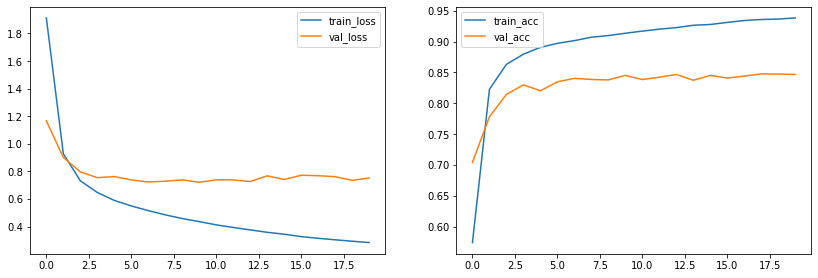

In [6]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=20, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Increase Epochs

Epoch 1/100
680/680 [==============================] - 8s 9ms/step - loss: 1.9219 - accuracy: 0.5692 - val_loss: 1.1539 - val_accuracy: 0.7278
Epoch 2/100
680/680 [==============================] - 5s 7ms/step - loss: 0.9375 - accuracy: 0.8177 - val_loss: 0.8760 - val_accuracy: 0.7817
Epoch 3/100
680/680 [==============================] - 5s 7ms/step - loss: 0.7497 - accuracy: 0.8600 - val_loss: 0.7783 - val_accuracy: 0.8218
Epoch 4/100
680/680 [==============================] - 5s 7ms/step - loss: 0.6629 - accuracy: 0.8776 - val_loss: 0.7515 - val_accuracy: 0.8290
Epoch 5/100
680/680 [==============================] - 4s 5ms/step - loss: 0.6046 - accuracy: 0.8876 - val_loss: 0.7573 - val_accuracy: 0.8224
Epoch 6/100
680/680 [==============================] - 4s 5ms/step - loss: 0.5577 - accuracy: 0.8965 - val_loss: 0.7378 - val_accuracy: 0.8388
Epoch 7/100
680/680 [==============================] - 4s 5ms/step - loss: 0.5224 - accuracy: 0.9006 - val_loss: 0.6949 - val_accuracy: 0.8424

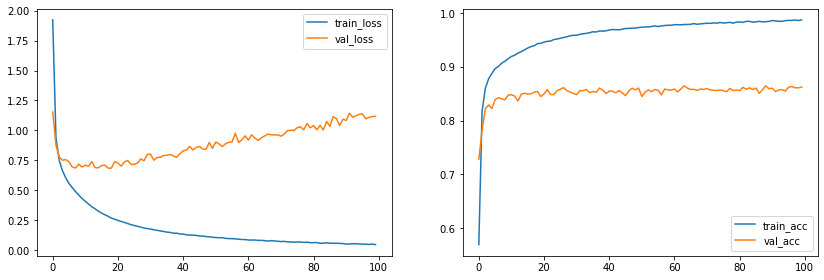

In [7]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Änderung an Epochs und Neuronen 
Epochs = 100 
Dense = 86 * 2 = 172

Epoch 1/50
680/680 [==============================] - 8s 7ms/step - loss: 1.5957 - accuracy: 0.6556 - val_loss: 0.9595 - val_accuracy: 0.7530
Epoch 2/50
680/680 [==============================] - 5s 7ms/step - loss: 0.7854 - accuracy: 0.8523 - val_loss: 0.7696 - val_accuracy: 0.8181
Epoch 3/50
680/680 [==============================] - 5s 7ms/step - loss: 0.6369 - accuracy: 0.8813 - val_loss: 0.7206 - val_accuracy: 0.8380
Epoch 4/50
680/680 [==============================] - 4s 6ms/step - loss: 0.5516 - accuracy: 0.8952 - val_loss: 0.7304 - val_accuracy: 0.8377
Epoch 5/50
680/680 [==============================] - 5s 7ms/step - loss: 0.4836 - accuracy: 0.9072 - val_loss: 0.6832 - val_accuracy: 0.8501
Epoch 6/50
680/680 [==============================] - 5s 7ms/step - loss: 0.4258 - accuracy: 0.9163 - val_loss: 0.7140 - val_accuracy: 0.8462
Epoch 7/50
680/680 [==============================] - 4s 7ms/step - loss: 0.3767 - accuracy: 0.9241 - val_loss: 0.6766 - val_accuracy: 0.8448
Epoch 

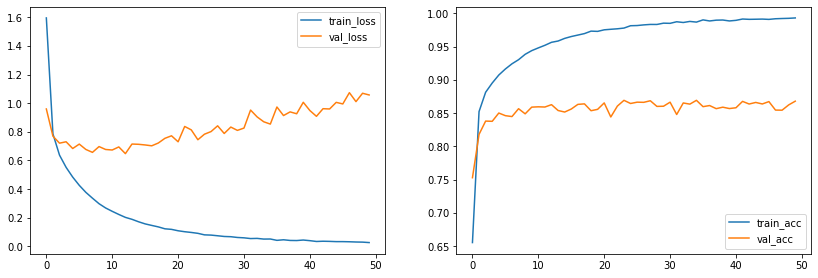

In [7]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(172, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=50, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

val_loss steigt stark -> overfitting

#### Änderungen

Versuch durch mehr Neuronen + Epochs overfitting zu umgehen
Dense = 344 (172*2)
Epoch = 100

Epoch 1/100
680/680 [==============================] - 7s 9ms/step - loss: 1.4104 - accuracy: 0.6930 - val_loss: 0.8695 - val_accuracy: 0.7850
Epoch 2/100
680/680 [==============================] - 8s 12ms/step - loss: 0.6655 - accuracy: 0.8725 - val_loss: 0.7378 - val_accuracy: 0.8158
Epoch 3/100
680/680 [==============================] - 10s 15ms/step - loss: 0.5225 - accuracy: 0.8967 - val_loss: 0.7135 - val_accuracy: 0.8319
Epoch 4/100
680/680 [==============================] - 6s 9ms/step - loss: 0.4231 - accuracy: 0.9153 - val_loss: 0.6961 - val_accuracy: 0.8395
Epoch 5/100
680/680 [==============================] - 6s 9ms/step - loss: 0.3514 - accuracy: 0.9279 - val_loss: 0.6419 - val_accuracy: 0.8534
Epoch 6/100
680/680 [==============================] - 6s 9ms/step - loss: 0.2935 - accuracy: 0.9383 - val_loss: 0.6074 - val_accuracy: 0.8656
Epoch 7/100
680/680 [==============================] - 6s 9ms/step - loss: 0.2511 - accuracy: 0.9459 - val_loss: 0.6648 - val_accuracy: 0.8

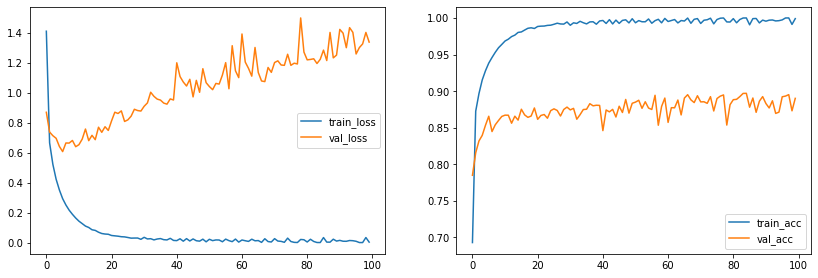

In [8]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Extremes Overfitting -> zu erkennen an dem val_loss Graphen (sollte nach unten verlaufen)

### Dropout
Dropout 0.5  + Decrease Neuronen = 172

Epoch 1/120
680/680 [==============================] - 6s 8ms/step - loss: 2.4754 - accuracy: 0.3430 - val_loss: 1.4069 - val_accuracy: 0.6897
Epoch 2/120
680/680 [==============================] - 5s 7ms/step - loss: 1.5568 - accuracy: 0.5877 - val_loss: 0.9819 - val_accuracy: 0.7815
Epoch 3/120
680/680 [==============================] - 5s 7ms/step - loss: 1.2936 - accuracy: 0.6562 - val_loss: 0.8728 - val_accuracy: 0.8074
Epoch 4/120
680/680 [==============================] - 5s 7ms/step - loss: 1.1682 - accuracy: 0.6913 - val_loss: 0.7840 - val_accuracy: 0.8119
Epoch 5/120
680/680 [==============================] - 5s 7ms/step - loss: 1.0870 - accuracy: 0.7087 - val_loss: 0.6985 - val_accuracy: 0.8400
Epoch 6/120
680/680 [==============================] - 5s 7ms/step - loss: 1.0280 - accuracy: 0.7248 - val_loss: 0.6792 - val_accuracy: 0.8448
Epoch 7/120
680/680 [==============================] - 5s 7ms/step - loss: 0.9868 - accuracy: 0.7342 - val_loss: 0.6626 - val_accuracy: 0.8518

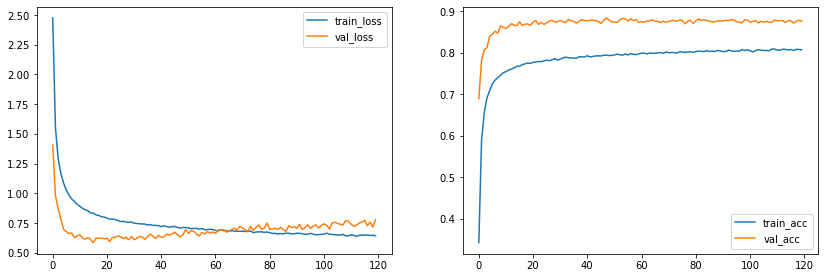

In [8]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_50 = Sequential()
three_layer_mlp_dropout_50.add(Dense(172, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_50.add(Dropout(0.5))
three_layer_mlp_dropout_50.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_50.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_50_history = three_layer_mlp_dropout_50.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_50_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_50_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_50_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_50_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Dropout

nun fügen wir einen Dropout dem Netz hinzu und beobachten val_loss und val_accuracy 

Mehr Neuronen (344) dann overfitting?

Epoch 1/100
680/680 [==============================] - 7s 10ms/step - loss: 2.0221 - accuracy: 0.4876 - val_loss: 1.0507 - val_accuracy: 0.7568
Epoch 2/100
680/680 [==============================] - 6s 9ms/step - loss: 1.0628 - accuracy: 0.7456 - val_loss: 0.7699 - val_accuracy: 0.8178
Epoch 3/100
680/680 [==============================] - 7s 10ms/step - loss: 0.8480 - accuracy: 0.7932 - val_loss: 0.6857 - val_accuracy: 0.8409
Epoch 4/100
680/680 [==============================] - 7s 10ms/step - loss: 0.7337 - accuracy: 0.8197 - val_loss: 0.6118 - val_accuracy: 0.8512
Epoch 5/100
680/680 [==============================] - 7s 10ms/step - loss: 0.6646 - accuracy: 0.8331 - val_loss: 0.5758 - val_accuracy: 0.8641
Epoch 6/100
680/680 [==============================] - 7s 11ms/step - loss: 0.6086 - accuracy: 0.8453 - val_loss: 0.5576 - val_accuracy: 0.8733
Epoch 7/100
680/680 [==============================] - 8s 11ms/step - loss: 0.5738 - accuracy: 0.8533 - val_loss: 0.5297 - val_accuracy: 

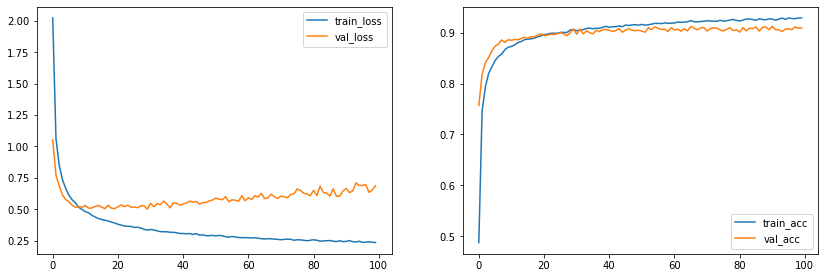

In [9]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_50 = Sequential()
three_layer_mlp_dropout_50.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_50.add(Dropout(0.5))
three_layer_mlp_dropout_50.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_50.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_dropout_50_history = three_layer_mlp_dropout_50.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_50_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_50_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_50_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_50_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Änderung Droprate

Overfitting stark zurückgegangen -> Droprate nochmals anpassen
Droprate auf 0.3

Epoch 1/100
680/680 [==============================] - 7s 8ms/step - loss: 1.6538 - accuracy: 0.6050 - val_loss: 0.8899 - val_accuracy: 0.7892
Epoch 2/100
680/680 [==============================] - 7s 11ms/step - loss: 0.7943 - accuracy: 0.8254 - val_loss: 0.7025 - val_accuracy: 0.8272
Epoch 3/100
680/680 [==============================] - 10s 15ms/step - loss: 0.6021 - accuracy: 0.8645 - val_loss: 0.6427 - val_accuracy: 0.8407
Epoch 4/100
680/680 [==============================] - 7s 10ms/step - loss: 0.5047 - accuracy: 0.8836 - val_loss: 0.5990 - val_accuracy: 0.8550
Epoch 5/100
680/680 [==============================] - 6s 9ms/step - loss: 0.4318 - accuracy: 0.8973 - val_loss: 0.5441 - val_accuracy: 0.8746
Epoch 6/100
680/680 [==============================] - 6s 9ms/step - loss: 0.3844 - accuracy: 0.9076 - val_loss: 0.5385 - val_accuracy: 0.8773
Epoch 7/100
680/680 [==============================] - 6s 9ms/step - loss: 0.3451 - accuracy: 0.9152 - val_loss: 0.5682 - val_accuracy: 0.

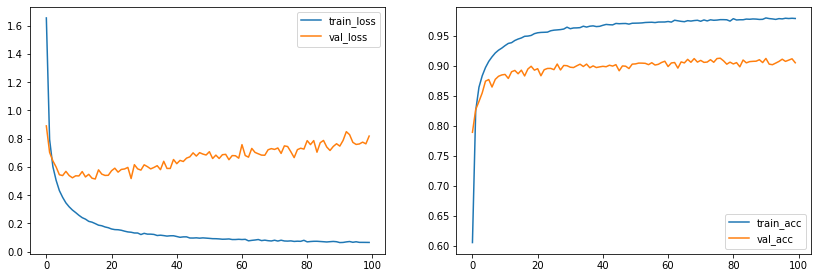

In [5]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(344, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=100, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray))


#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Droprate 0.3 aber mit weniger neuronen (172)

Epoch 1/60
680/680 [==============================] - 9s 8ms/step - loss: 2.1040 - accuracy: 0.4707 - val_loss: 1.1332 - val_accuracy: 0.7369
Epoch 2/60
680/680 [==============================] - 5s 7ms/step - loss: 1.1305 - accuracy: 0.7320 - val_loss: 0.8136 - val_accuracy: 0.8036
Epoch 3/60
680/680 [==============================] - 6s 10ms/step - loss: 0.8842 - accuracy: 0.7927 - val_loss: 0.7062 - val_accuracy: 0.8349
Epoch 4/60
680/680 [==============================] - 6s 8ms/step - loss: 0.7722 - accuracy: 0.8148 - val_loss: 0.6491 - val_accuracy: 0.8489
Epoch 5/60
680/680 [==============================] - 6s 8ms/step - loss: 0.6968 - accuracy: 0.8304 - val_loss: 0.6326 - val_accuracy: 0.8500
Epoch 6/60
680/680 [==============================] - 6s 9ms/step - loss: 0.6400 - accuracy: 0.8422 - val_loss: 0.6027 - val_accuracy: 0.8595
Epoch 7/60
680/680 [==============================] - 6s 9ms/step - loss: 0.5976 - accuracy: 0.8508 - val_loss: 0.5904 - val_accuracy: 0.8607
Epoch

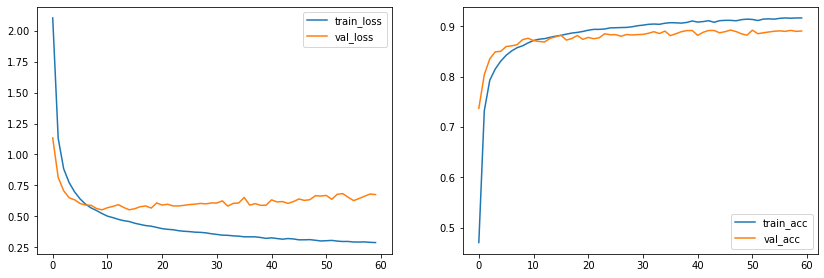

In [12]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(172, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.3))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray))


#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

#### Epochs auf 60 reduzieren, genug aussagekraft basierend auf vorherigen Ergebnissen

val_loss stieg auch, daher Droprate wieder erhöhen

Droprate 0,4

Epoch = 60

### Dropoutanpassung 
Dropout 0,4 aber mit Neuronen = 172

Epoch 1/120
680/680 [==============================] - 6s 7ms/step - loss: 2.1519 - accuracy: 0.4502 - val_loss: 1.1647 - val_accuracy: 0.7294
Epoch 2/120
680/680 [==============================] - 4s 6ms/step - loss: 1.1901 - accuracy: 0.7095 - val_loss: 0.8232 - val_accuracy: 0.8008
Epoch 3/120
680/680 [==============================] - 4s 6ms/step - loss: 0.9610 - accuracy: 0.7660 - val_loss: 0.7216 - val_accuracy: 0.8199
Epoch 4/120
680/680 [==============================] - 4s 6ms/step - loss: 0.8392 - accuracy: 0.7933 - val_loss: 0.6579 - val_accuracy: 0.8435
Epoch 5/120
680/680 [==============================] - 4s 6ms/step - loss: 0.7650 - accuracy: 0.8087 - val_loss: 0.6388 - val_accuracy: 0.8492
Epoch 6/120
680/680 [==============================] - 4s 6ms/step - loss: 0.7123 - accuracy: 0.8198 - val_loss: 0.6126 - val_accuracy: 0.8592
Epoch 7/120
680/680 [==============================] - 4s 6ms/step - loss: 0.6728 - accuracy: 0.8273 - val_loss: 0.6059 - val_accuracy: 0.8585

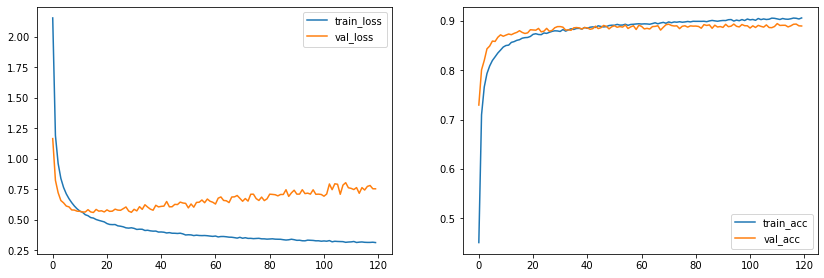

In [6]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(172, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Auswertung:

Overfitting geringer als bei Dropout = 0.3 -> Dropout = 0.4 beibehalten

Test mit Neuronen = 120

Epoch 1/120
680/680 [==============================] - 6s 6ms/step - loss: 2.5484 - accuracy: 0.3278 - val_loss: 1.4291 - val_accuracy: 0.6710
Epoch 2/120
680/680 [==============================] - 4s 5ms/step - loss: 1.5724 - accuracy: 0.5863 - val_loss: 1.0388 - val_accuracy: 0.7675
Epoch 3/120
680/680 [==============================] - 4s 5ms/step - loss: 1.3181 - accuracy: 0.6541 - val_loss: 0.8687 - val_accuracy: 0.7990
Epoch 4/120
680/680 [==============================] - 4s 5ms/step - loss: 1.1836 - accuracy: 0.6879 - val_loss: 0.7774 - val_accuracy: 0.8184
Epoch 5/120
680/680 [==============================] - 4s 6ms/step - loss: 1.1128 - accuracy: 0.7026 - val_loss: 0.7374 - val_accuracy: 0.8245
Epoch 6/120
680/680 [==============================] - 4s 5ms/step - loss: 1.0524 - accuracy: 0.7138 - val_loss: 0.7185 - val_accuracy: 0.8298
Epoch 7/120
680/680 [==============================] - 4s 5ms/step - loss: 1.0178 - accuracy: 0.7233 - val_loss: 0.7019 - val_accuracy: 0.8330

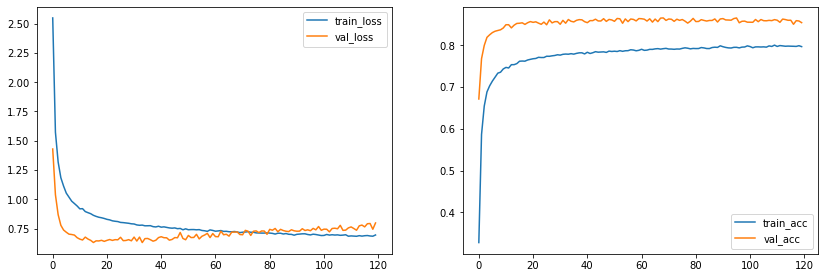

In [22]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(120, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Neuronen auf 145 Dropout  = 0.4

Epoch 1/150
680/680 [==============================] - 5s 7ms/step - loss: 2.4741 - accuracy: 0.3448 - val_loss: 1.4145 - val_accuracy: 0.6715
Epoch 2/150
680/680 [==============================] - 4s 6ms/step - loss: 1.5280 - accuracy: 0.5973 - val_loss: 1.0009 - val_accuracy: 0.7705
Epoch 3/150
680/680 [==============================] - 4s 6ms/step - loss: 1.2644 - accuracy: 0.6684 - val_loss: 0.8406 - val_accuracy: 0.7982
Epoch 4/150
680/680 [==============================] - 7s 11ms/step - loss: 1.1356 - accuracy: 0.7009 - val_loss: 0.7785 - val_accuracy: 0.8174
Epoch 5/150
680/680 [==============================] - 6s 9ms/step - loss: 1.0575 - accuracy: 0.7186 - val_loss: 0.7487 - val_accuracy: 0.8158
Epoch 6/150
680/680 [==============================] - 6s 9ms/step - loss: 1.0022 - accuracy: 0.7297 - val_loss: 0.7292 - val_accuracy: 0.8261
Epoch 7/150
680/680 [==============================] - 5s 7ms/step - loss: 0.9598 - accuracy: 0.7412 - val_loss: 0.7237 - val_accuracy: 0.826

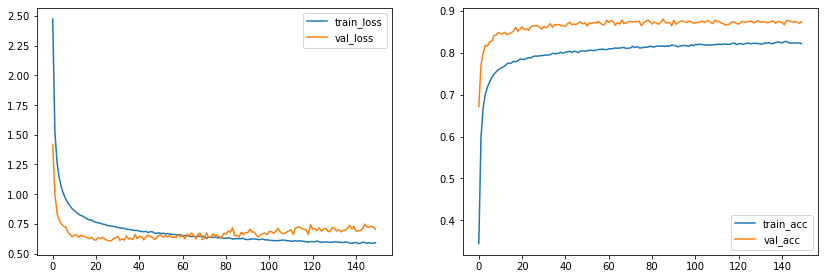

In [10]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(135, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.45))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=150, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Neuronen = 120 + Dropout = 0.4 bestes ergebnis

# Vergleich von versch. Aktivierungsfunktionen

Aktivierungsfunktion sigmoid

Epoch 1/120
680/680 [==============================] - 5s 6ms/step - loss: 2.5361 - accuracy: 0.3668 - val_loss: 1.4966 - val_accuracy: 0.6631
Epoch 2/120
680/680 [==============================] - 4s 5ms/step - loss: 1.3511 - accuracy: 0.6725 - val_loss: 0.9778 - val_accuracy: 0.7737
Epoch 3/120
680/680 [==============================] - 4s 5ms/step - loss: 1.0147 - accuracy: 0.7576 - val_loss: 0.7952 - val_accuracy: 0.8078
Epoch 4/120
680/680 [==============================] - 4s 5ms/step - loss: 0.8503 - accuracy: 0.7957 - val_loss: 0.6914 - val_accuracy: 0.8369
Epoch 5/120
680/680 [==============================] - 4s 5ms/step - loss: 0.7500 - accuracy: 0.8198 - val_loss: 0.6442 - val_accuracy: 0.8471
Epoch 6/120
680/680 [==============================] - 4s 5ms/step - loss: 0.6777 - accuracy: 0.8349 - val_loss: 0.6036 - val_accuracy: 0.8543
Epoch 7/120
680/680 [==============================] - 4s 5ms/step - loss: 0.6268 - accuracy: 0.8459 - val_loss: 0.5798 - val_accuracy: 0.8638

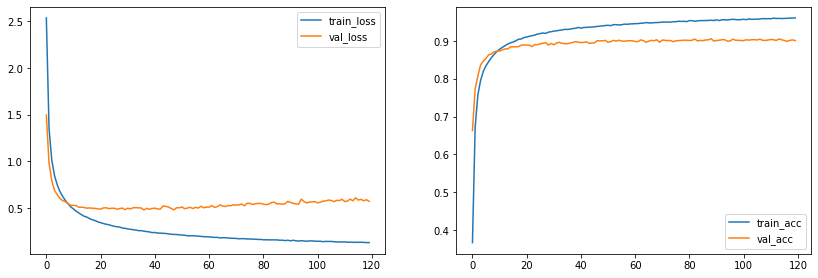

In [20]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(120, activation ='sigmoid', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Schlechter als relu 

val_loss: 0.4491 - val_accuracy: 0.9108

### Vergleich mit Aktivierungsfunktion GELU

In [ ]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(120, activation ='sigmoid', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=60, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

val_loss + val_acc besser als relu

# Vergleich von versch. Optimizern

initial = adam

adagrad

adadelta

Epoch 1/200
680/680 [==============================] - 7s 6ms/step - loss: 3.7316 - accuracy: 0.0457 - val_loss: 3.6391 - val_accuracy: 0.1052
Epoch 2/200
680/680 [==============================] - 4s 6ms/step - loss: 3.6076 - accuracy: 0.0844 - val_loss: 3.5334 - val_accuracy: 0.1534
Epoch 3/200
680/680 [==============================] - 4s 5ms/step - loss: 3.4996 - accuracy: 0.1205 - val_loss: 3.4079 - val_accuracy: 0.2228
Epoch 4/200
680/680 [==============================] - 4s 6ms/step - loss: 3.3879 - accuracy: 0.1554 - val_loss: 3.2879 - val_accuracy: 0.2682
Epoch 5/200
680/680 [==============================] - 4s 6ms/step - loss: 3.2746 - accuracy: 0.1864 - val_loss: 3.1639 - val_accuracy: 0.3181
Epoch 6/200
680/680 [==============================] - 4s 6ms/step - loss: 3.1695 - accuracy: 0.2158 - val_loss: 3.0504 - val_accuracy: 0.3475
Epoch 7/200
680/680 [==============================] - 4s 6ms/step - loss: 3.0749 - accuracy: 0.2398 - val_loss: 2.9487 - val_accuracy: 0.3707

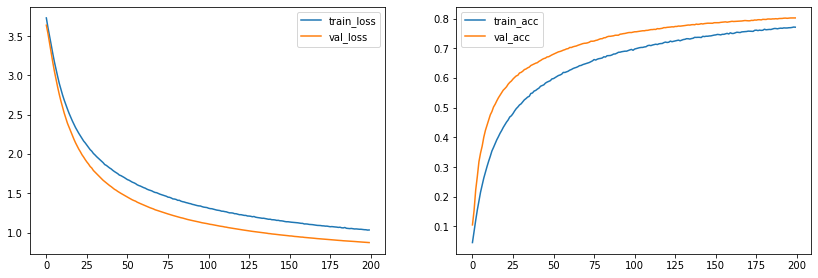

In [ ]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(120, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=300, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

### Zum Vergleich nun Optimizer wieder ändern

optimizer = adadelta

Epoch 1/200
680/680 [==============================] - 8s 7ms/step - loss: 3.8832 - accuracy: 0.0228 - val_loss: 3.7906 - val_accuracy: 0.0246
Epoch 2/200
680/680 [==============================] - 4s 6ms/step - loss: 3.8225 - accuracy: 0.0247 - val_loss: 3.7603 - val_accuracy: 0.0326
Epoch 3/200
680/680 [==============================] - 4s 6ms/step - loss: 3.7814 - accuracy: 0.0283 - val_loss: 3.7423 - val_accuracy: 0.0367
Epoch 4/200
680/680 [==============================] - 4s 7ms/step - loss: 3.7536 - accuracy: 0.0326 - val_loss: 3.7280 - val_accuracy: 0.0384
Epoch 5/200
680/680 [==============================] - 5s 7ms/step - loss: 3.7342 - accuracy: 0.0363 - val_loss: 3.7171 - val_accuracy: 0.0427
Epoch 6/200
680/680 [==============================] - 5s 7ms/step - loss: 3.7205 - accuracy: 0.0396 - val_loss: 3.7079 - val_accuracy: 0.0492
Epoch 7/200
680/680 [==============================] - 5s 7ms/step - loss: 3.7084 - accuracy: 0.0443 - val_loss: 3.7001 - val_accuracy: 0.0531

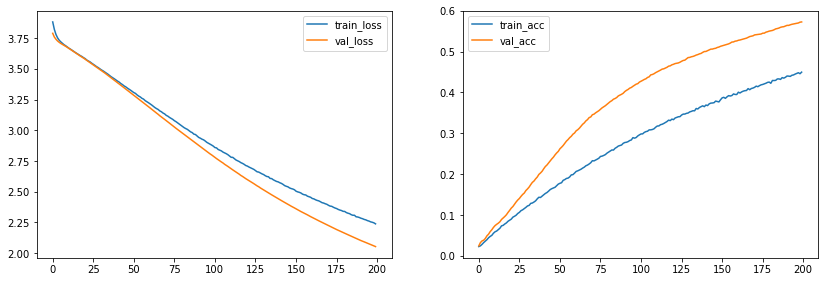

In [7]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(120, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.4))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
# early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          #  callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Letzte Anpassungen

Dense = 788

Epochs = 100

optimizer= adam

#### val_loss increases not needed more epochs than 60 (Overfitting)

# Test

Epoch 1/250
680/680 [==============================] - 6s 7ms/step - loss: 2.8956 - accuracy: 0.2100 - val_loss: 1.8747 - val_accuracy: 0.5900
Epoch 2/250
680/680 [==============================] - 4s 6ms/step - loss: 2.1502 - accuracy: 0.3908 - val_loss: 1.3965 - val_accuracy: 0.7149
Epoch 3/250
680/680 [==============================] - 4s 5ms/step - loss: 1.9146 - accuracy: 0.4509 - val_loss: 1.1799 - val_accuracy: 0.7429
Epoch 4/250
680/680 [==============================] - 4s 6ms/step - loss: 1.7964 - accuracy: 0.4775 - val_loss: 1.1013 - val_accuracy: 0.7564
Epoch 5/250
680/680 [==============================] - 4s 6ms/step - loss: 1.7335 - accuracy: 0.4955 - val_loss: 1.0303 - val_accuracy: 0.7681
Epoch 6/250
680/680 [==============================] - 4s 6ms/step - loss: 1.6783 - accuracy: 0.5092 - val_loss: 1.0040 - val_accuracy: 0.7822
Epoch 7/250
680/680 [==============================] - 4s 5ms/step - loss: 1.6459 - accuracy: 0.5178 - val_loss: 0.9383 - val_accuracy: 0.7971

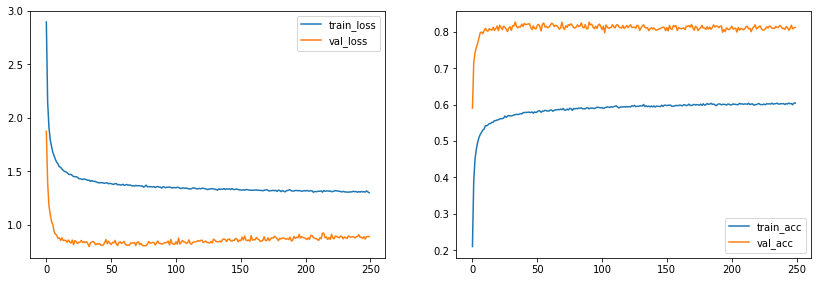

In [8]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(180, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.45))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=250, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_dropout_30_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_dropout_30_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

Epoch 1/400
680/680 [==============================] - 9s 11ms/step - loss: 3.7269 - accuracy: 0.0468 - val_loss: 3.6356 - val_accuracy: 0.0795
Epoch 2/400
680/680 [==============================] - 13s 19ms/step - loss: 3.6070 - accuracy: 0.0792 - val_loss: 3.5201 - val_accuracy: 0.1416
Epoch 3/400
680/680 [==============================] - 9s 13ms/step - loss: 3.4995 - accuracy: 0.1132 - val_loss: 3.4005 - val_accuracy: 0.2037
Epoch 4/400
680/680 [==============================] - 7s 11ms/step - loss: 3.3944 - accuracy: 0.1470 - val_loss: 3.2853 - val_accuracy: 0.2562
Epoch 5/400
680/680 [==============================] - 7s 10ms/step - loss: 3.2877 - accuracy: 0.1821 - val_loss: 3.1715 - val_accuracy: 0.2990
Epoch 6/400
680/680 [==============================] - 7s 11ms/step - loss: 3.1907 - accuracy: 0.2090 - val_loss: 3.0650 - val_accuracy: 0.3403
Epoch 7/400
680/680 [==============================] - 7s 10ms/step - loss: 3.0945 - accuracy: 0.2350 - val_loss: 2.9570 - val_accuracy

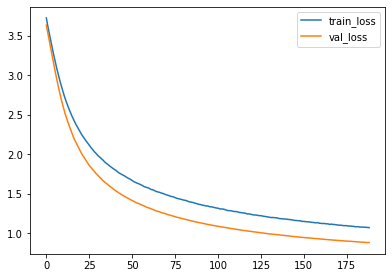

In [12]:
# Definition Topologie des Netzes
three_layer_mlp_dropout_30 = Sequential()
three_layer_mlp_dropout_30.add(Dense(130, activation ='relu', input_dim=1024))
three_layer_mlp_dropout_30.add(Dropout(0.45))
three_layer_mlp_dropout_30.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp_dropout_30.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

#Early Stopping implementieren -> Vermeidet Overfitting nach Anstieg z.B. von val_loss=0,02
early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True)

# Modell trainieren
three_layer_mlp_dropout_30_history = three_layer_mlp_dropout_30.fit(x_train_gray, y_train_gray, 
          epochs=400, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray), 
          callbacks=[early_stopping]
)
#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_dropout_30_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_dropout_30_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])